<a href="https://colab.research.google.com/github/Anna72/lab-lkfs/blob/main/fails_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
#/content/drive/MyDrive/Оптимизация технического обслуживания производственных ресурсов/sensor.csv
data = pd.read_csv("/content/drive/MyDrive/Оптимизация технического обслуживания производственных ресурсов/sensor.csv", encoding = 'utf-8', delimiter=',')
data.head(5)

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [ ]:
data.tail(5)

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,43.17085,54.16052,38.05424,13.26532,420.7993,NaN,463.2318,458.3615,2.499117,676.6655,405.7680,894.5920,543.5801,1109.501,611.1745,700.5885,796.5964,692.1138,779.2067,485.0358,691.6666,974.9999,927.6135,477.3156,266.0334,578.5221,817.5707,0.0,47.13541,29.16667,71.61458,30.468750,30.208330,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,43.21038,54.52602,38.53485,13.24227,422.1567,NaN,463.1928,468.4388,2.618476,676.6547,406.2575,895.5599,541.7014,1106.371,609.4917,698.4915,800.1906,697.8002,797.5571,510.9510,672.2222,927.0833,907.9463,487.8679,262.2222,568.1035,807.0151,0.0,46.87500,28.90625,73.17708,30.208332,29.947920,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,43.12836,55.11779,38.52678,13.18866,420.2166,NaN,462.4065,468.6293,2.620500,677.3162,407.1144,892.2204,542.8578,1106.698,610.9940,703.1645,800.3767,704.6601,799.3120,492.7720,689.3519,924.4791,926.8102,494.1249,260.8372,553.8872,805.5605,0.0,46.09375,28.64583,77.08333,29.947920,30.208330,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,42.35746,55.99321,38.89159,13.17346,420.5700,NaN,457.0362,459.7941,2.514596,672.6165,404.3277,887.9969,539.3630,1103.955,605.7183,697.3713,793.7070,706.9692,793.0610,490.2170,687.0370,931.7708,915.4362,484.1161,261.3184,559.4439,807.0808,0.0,45.83333,28.38542,78.64583,29.947916,30.208332,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,NORMAL
220319,220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,15.65393,15.01013,42.62814,56.49642,39.40957,13.12593,421.2080,NaN,468.9915,456.5726,2.487299,676.5834,405.6293,897.8508,542.0950,1108.827,608.5364,698.0792,800.0387,703.6251,800.2143,496.4068,686.1111,917.7083,926.3979,489.0367,258.4387,558.0558,811.1204,0.0,45.31250,27.86458,77.86458,29.947916,30.208332,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,NORMAL


https://www.kaggle.com/nphantawee/pump-sensor-data

This file contain 3 main group of data

*   Timestamp data
*   Sensor data(52 series): All values are raw values
*   Machine status: This is target label that I want to predict when the failure will happen



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4025519090>,
      dtype=object)

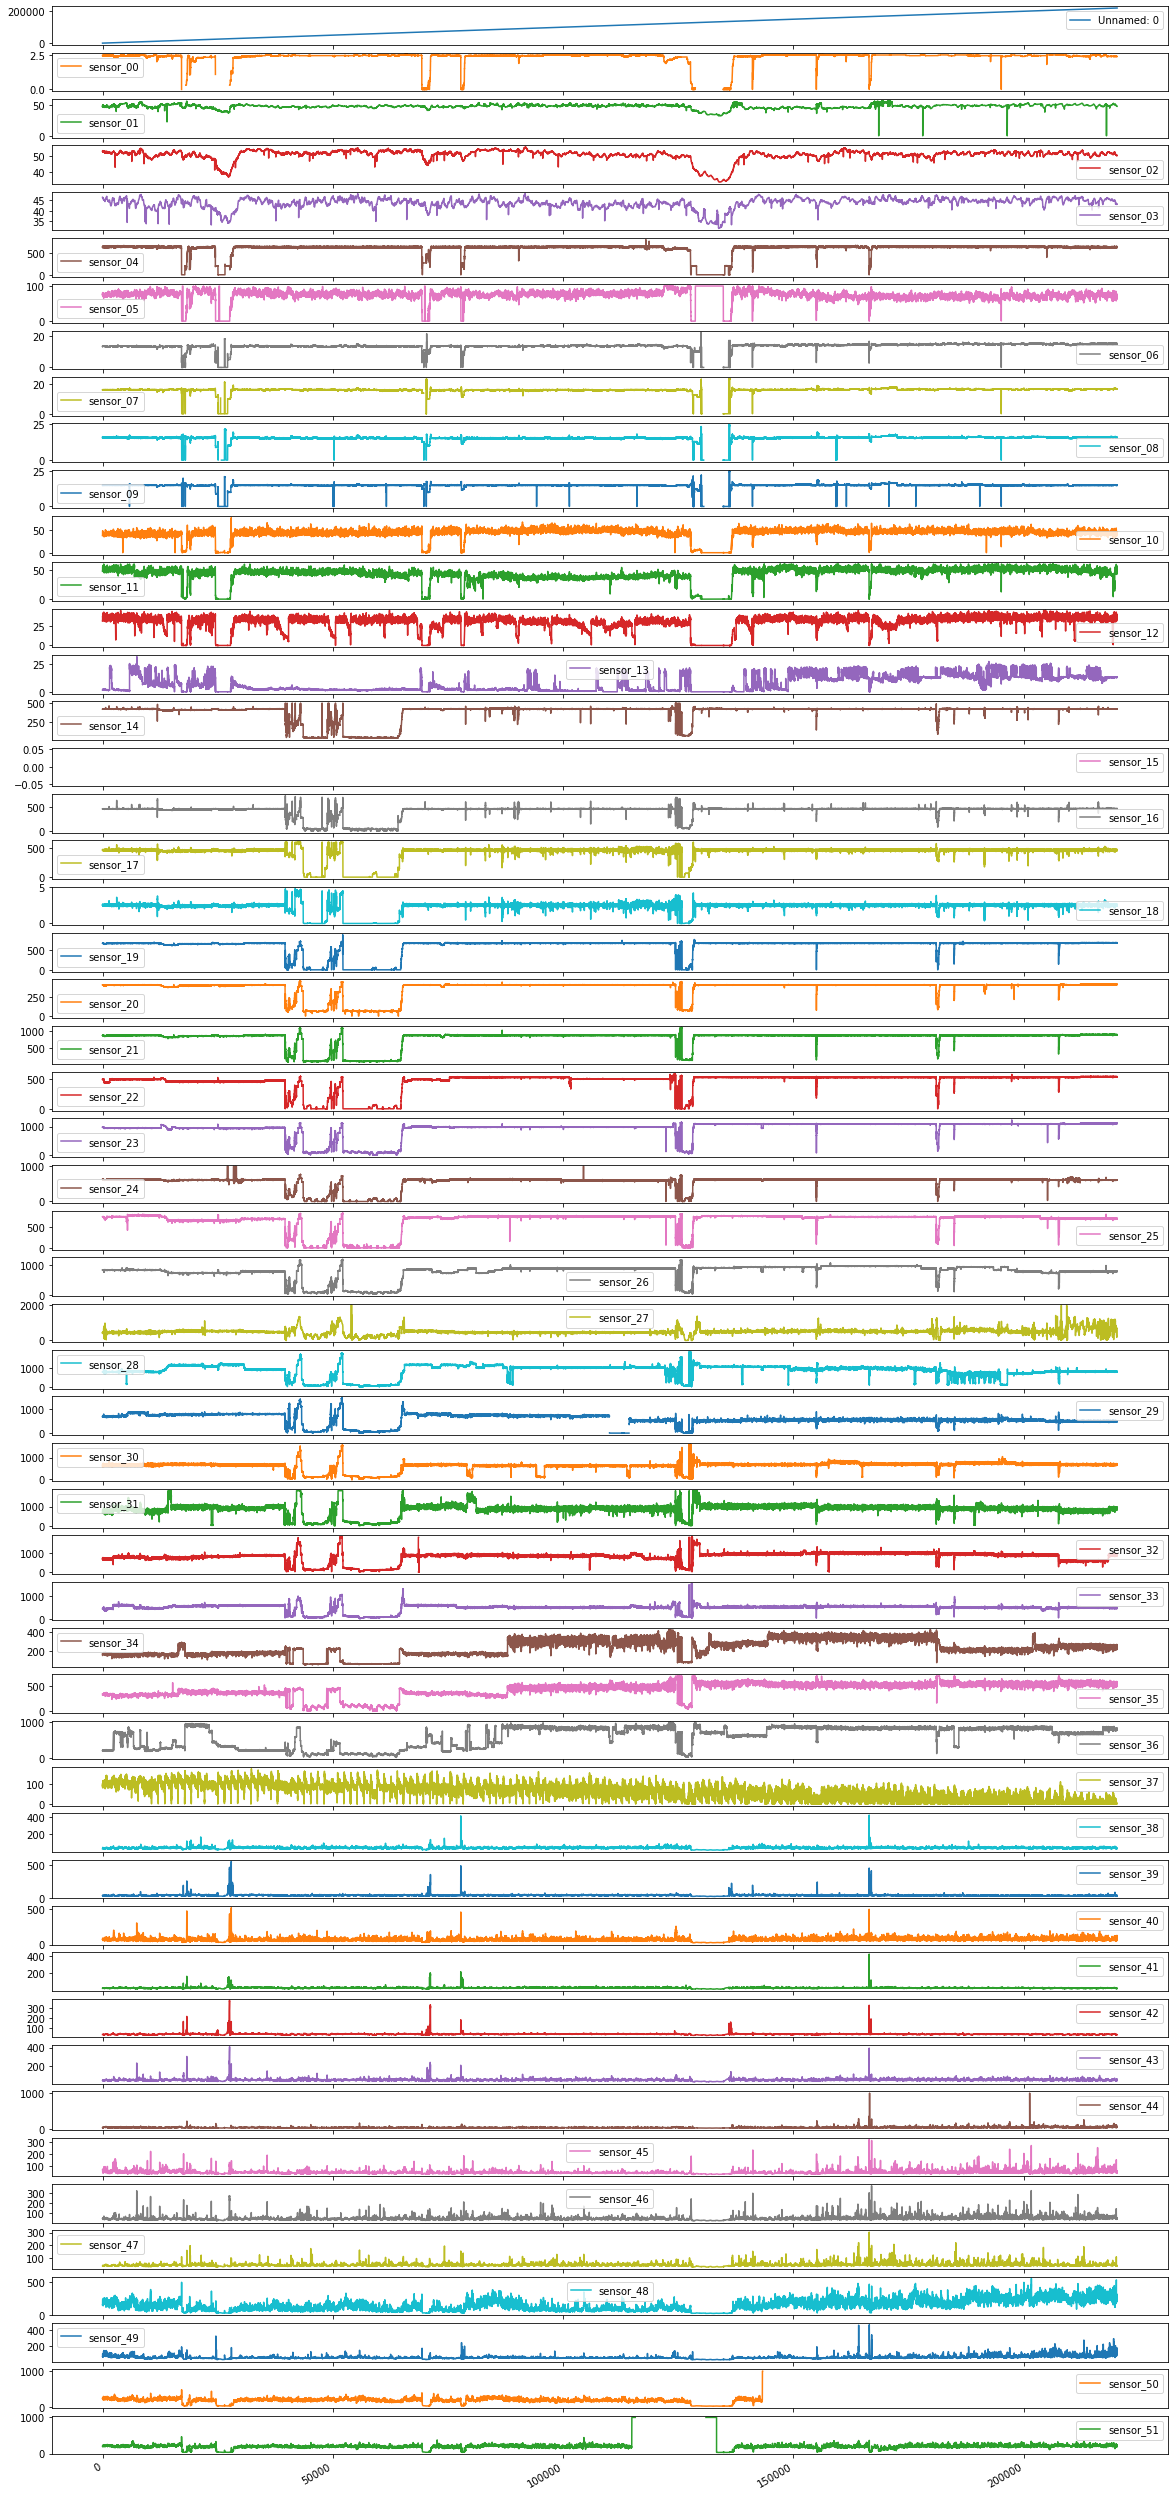

In [ ]:
import matplotlib.pyplot as plt
data.plot(subplots =True, sharex = True, figsize = (20,50))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4024373d90>,
      dtype=object)

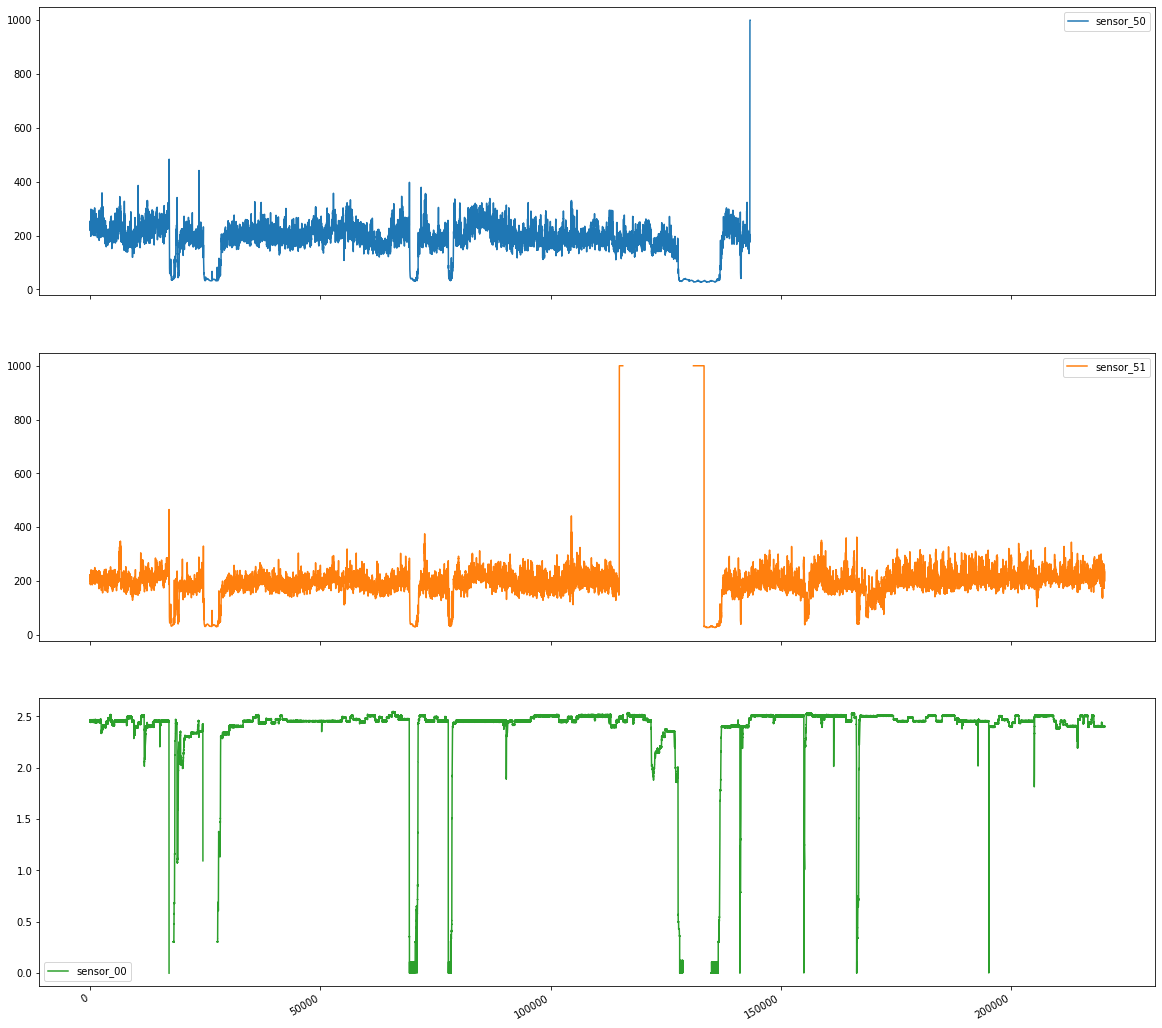

In [ ]:
df0 = pd.DataFrame(data, columns=['sensor_50', 'sensor_51', 'sensor_00'])
df0.plot(subplots = True, sharex = True, figsize = (20,20))

In [ ]:
data['sensor_50']

0         243.0556
1         243.0556
2         241.3194
3         240.4514
4         242.1875
            ...   
220315         NaN
220316         NaN
220317         NaN
220318         NaN
220319         NaN
Name: sensor_50, Length: 220320, dtype: float64

 'sensor_50', 'sensor_51', 'sensor_00' 

 some values missing 



In [ ]:
data['machine_status'].value_counts()


NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [ ]:
data1 = data['machine_status']

data1copy = data1.copy()
for i,x in enumerate( data1copy):
   if x == 'NORMAL':
     data1copy[i] = 2 
   else:
     if x == 'RECOVERING':
       data1copy[i] = 1
     else: data1copy[i] = 0 

# mask = data1copy.str.startswith('N')
# data1copy.loc[mask] = 2
# mask = data1copy.str.startswith('R')
# data1copy.loc[mask] = 1
# mask = data1copy.str.startswith('B')
# data1copy.loc[mask] = 0

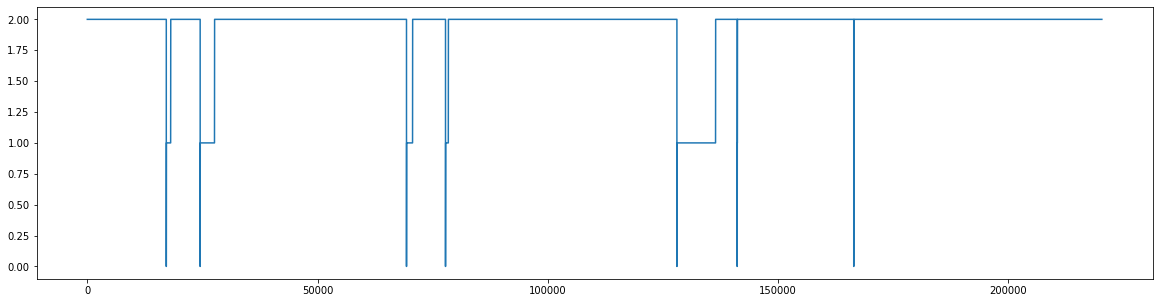

In [ ]:
data1copy.plot(figsize = (20,5))